In this notebook we will load a sample from a full length movie and demonstrate how to make time projection and then use cellpose to make segmentation masks. This will give us the motion of the nuclei/cell and hence overall area in which the nuclei can be found over the length of the movie

## Import all necessary libraries 

In [11]:
import os
import math
import napari
import tifffile
import numpy as np
import matplotlib.pyplot as plt

from cellpose import models
from dask.array.image import imread as imr
from cellpose.io import imread, save_to_png, masks_flows_to_seg

## Load pretrained cellpose model 

In [12]:
liveCellModel = models.CellposeModel(pretrained_model='../liveCellModel/HelaLiveCell_09')

##  Specify path to input and output


#### input is the movie data
#### output is the time projection and segmentation results

In [13]:
pathToTimeFrames = '../demoData/Hela_h9_h2_k11_mcpsg_1hrbasal_14hr_10ng.ml_tnf_exp1_4_F11/*.tif'
pathToTProjections = '../demoData/maxProject/'

## Load data

In [14]:
movieName = pathToTimeFrames.split('/')[-2]
print('Movie folder found', movieName)
timeStack = imr(pathToTimeFrames)
print('Shape of the movie data (t,z,y,x):', timeStack.shape)

Movie folder found Hela_h9_h2_k11_mcpsg_1hrbasal_14hr_10ng.ml_tnf_exp1_4_F11
Shape of the movie data (t,z,y,x): (20, 13, 1024, 1024)


## Make time projection 

In [15]:
maxImage = np.max(timeStack, axis=1)
MaxTimePoint=timeStack.shape[0]
TimeProjection = np.max(maxImage, axis=0)

# Save time projection for later use

with tifffile.TiffWriter(pathToTProjections+'T_MAX_'+ movieName.replace('.','_') +'.tif', imagej=True) as tif:
            tif.save(TimeProjection)

/tmp/ipykernel_24647/2430429459.py:8: DeprecationWarning: <tifffile.TiffWriter.save> is deprecated. Use TiffWriter.write
  tif.save(TimeProjection)


## Verify time projection

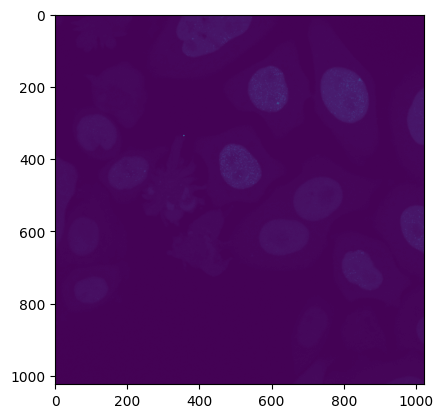

In [6]:
timeProject = imread(pathToTProjections+'/T_MAX_'+ movieName.replace('.','_') +'.tif')
plt.imshow(timeProject)

## Segmentation using Cellpose 

In [10]:
# Specify model parameters

imgs = TimeProjection
nimg = len(imgs)
channels = [[0,0]]

# Segmentation

masks, flows, styles = liveCellModel.eval(imgs, diameter=None, channels=channels)

# Save segmentation Results

masks_flows_to_seg(imgs, masks, flows, 1, pathToTProjections+'T_MAX_'+movieName.replace('.','_'), channels)
save_to_png(imgs, masks, flows, pathToTProjections+'T_MAX_'+movieName.replace('.','_'))

In [16]:
# Load saved mask

label_image_name = pathToTProjections+'T_MAX_'+movieName.replace('.','_')+'_cp_masks.png'
label_image = imread(label_image_name)

## Visualise Results 

In [17]:
viewer = napari.Viewer()
image_layer = viewer.add_image(
        timeProject, colormap='green' #maxImageCell
        )
labels_layer = viewer.add_labels(label_image, name='segmentation',opacity=0.3)

In [12]:
import session_info
session_info.show()